# Bitteliten demo av pandas

Pandas er et bibilotek for programmeringsspråket python. For å komme i gang:

* Installer [Anaconda](https://www.continuum.io/downloads) (velg python 3.x)
* Start jupyter QtConsole (alternativt IPython)

For å få lastet inn biblioteket pandas, skriver du:

In [1]:
%matplotlib inline
import pandas as pd

Så laster vi inn en datafil på CSV-format (comma separated value):

In [2]:
auto = pd.read_csv('auto.csv')

Dette er en stor fil med data for mange historiske biler. Vi kan se de første fem linjene av denne tabellen ved å skrive:

In [3]:
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Vi kan også få diverse statistikk ved å bruke funksjonen _describe_. Her ser vi at det er 397 ulike bilmodeller i datasettet, og vi får endel statistikk om hver parameter:

In [4]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Vi kan nå enkelt plotte størrelser i tabellene mot hverandre. F.eks. aksellerasjon som funksjon av hestekrefter:

(68.0, 455.0)

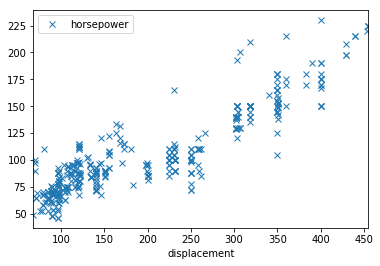

In [5]:
ax = auto.plot(x='displacement', y='horsepower', style='x')
ax.set_xlim(auto['displacement'].min(), auto['displacement'].max())

Vi kan også lage mer statistiske plot, som f.eks. boxplot der hvor vi har kategoriske data, som f.eks. antall sylindre. Her er bensinforbruket (i miles per gallon) mot antall sylindre:

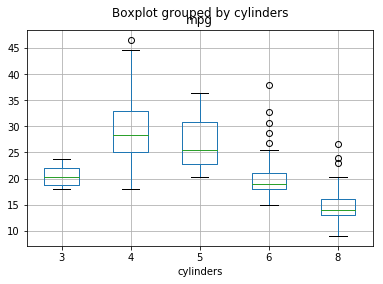

In [6]:
auto.boxplot('mpg', 'cylinders')

Eller vi kan lage pivot-tabeller (regner gjennomsnitt hvis ikke annet oppgis):

In [7]:
pivot = auto.pivot_table(index='cylinders')
pivot

,acceleration,displacement,horsepower,mpg,origin,weight,year
cylinders,,,,,,,
3,13.250000,72.500000,99.250000,20.550000,3.000000,2398.500000,75.500000
4,16.582266,109.593596,78.281407,29.317734,1.990148,2304.546798,77.049261
5,18.633333,145.000000,82.333333,27.366667,2.000000,3103.333333,79.000000
6,16.263095,218.142857,101.506024,19.985714,1.190476,3198.226190,75.928571
8,12.955340,345.009709,158.300971,14.963107,1.000000,4114.718447,73.902913


Og plotte verdiene fra pivottabellen

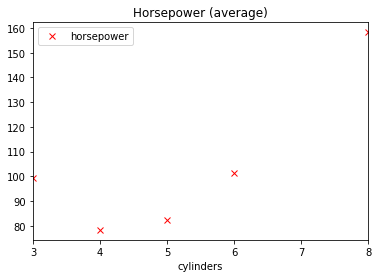

In [8]:
pivot.plot(y='horsepower', style='xr', title='Horsepower (average)')

Det er også mulig f.eks. å lage en sammenstilling av flere parametre samtidig:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fff82dd68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0fff48c7f0>]], dtype=object)

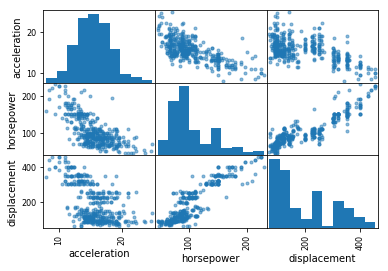

In [9]:
from pandas.tools import plotting
plotting.scatter_matrix(auto[['acceleration', 'horsepower', 'displacement']])

Man kan også gjøre nokså avanserte statistiske analyser. F.eks. viser regresjonsmodellen under at akselerasjonen øker signifikant med motorens effekt, mens den faktisk avtar med motorvolum ved samme effekt (skyldes antagelig vekt?)

In [10]:
from statsmodels.formula.api import ols
model = ols("acceleration ~ horsepower + displacement + 1", auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     197.3
Date:                Thu, 14 Sep 2017   Prob (F-statistic):           7.10e-60
Time:                        16:25:24   Log-Likelihood:                -816.29
No. Observations:                 392   AIC:                             1639.
Df Residuals:                     389   BIC:                             1650.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.3115      0.313     68.125   

Sånn, da er vi i gang, og det er bare å bruke pandas til å analysere data. Her er mer stoff for viderekommende:

* [Pandas CookBook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/v0.1/cookbook/)
* Pandas [hjemmeside](http://pandas.pydata.org/) med masser av dokumentasjon

God fornøyelse!